### **Machine Learning - Graded Micro-project**<br>HR Dataset Goals
     1. Uncovering HR Dataset possible reasons for employee attrition.
     2. Build appropriate classification ML models.
     3. Choose the best model and mention the reasons behind doing so. 
     4. Summarize the key conclusions and make suggestions to the organization. 

In [1]:
## Importing Python Libraries & Dataset Assessment 
#1. Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#2. To avoid warnings
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter('ignore')
from termcolor import colored

#3. To see all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None) 

#4. Scaling and Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#5.ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC


#6. To Balance Dataset
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
model_df = pd.DataFrame(columns=['Model','Dataset','Accuracy','Precision',   
                                 'Recall','F1_Score','ROC-AUC','Confusion_Matrix','Min_macro',   
                                 'Average_macro','Max_macro','Total_Features', 'Features'])


#7. Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
data=pd.read_csv("HR_DATASET.csv")


In [3]:
data.shape

(917, 35)

In [4]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
# Null Values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#Duplicate values
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

In [8]:
data.describe().T

count          mean          std     min     25%  \
Age                       917.0     36.938931     8.984981    18.0    30.0   
DailyRate                 917.0    785.711014   401.902148   102.0   444.0   
DistanceFromHome          917.0      9.294438     8.092566     1.0     2.0   
Education                 917.0      2.921483     1.020717     1.0     2.0   
EmployeeCount             917.0      1.000000     0.000000     1.0     1.0   
EmployeeNumber            917.0   1413.466739   388.606884     1.0  1084.0   
EnvironmentSatisfaction   917.0      2.738277     1.103382     1.0     2.0   
HourlyRate                917.0     66.231189    20.237536    30.0    49.0   
JobInvolvement            917.0      2.721919     0.720936     1.0     2.0   
JobLevel                  917.0      2.044711     1.100400     1.0     1.0   
JobSatisfaction           917.0      2.688113     1.110097     1.0     2.0   
MonthlyIncome             917.0   6452.293348  4685.137761  1051.0  2933.0   
MonthlyRate               917.0  14428.468920  7188.332799  2097.0  8018.0   
NumCompaniesWorked        917.0      2.696838     2.489217     0.0     1.0   
PercentSalaryHike         917.0     15.214831     3.640007    11.0    12.0   
PerformanceRating         917.0      3.149400     0.356677     3.0     3.0   
RelationshipSatisfaction  917.0      2.637950     1.078673     1.0     2.0   
StandardHours             917.0     80.000000     0.000000    80.0    80.0   
StockOptionLevel          917.0      0.821156     0.864555     0.0     0.0   
TotalWorkingYears         917.0     11.179935     7.802790     0.0     6.0   
TrainingTimesLastYear     917.0      2.791712     1.292917     0.0     2.0   
WorkLifeBalance           917.0      2.760087     0.708047     1.0     2.0   
YearsAtCompany            917.0      6.972737     5.951250     0.0     3.0   
YearsInCurrentRole        917.0      4.217012     3.588223     0.0     2.0   
YearsSinceLastPromotion   917.0      2.147219     3.176250     0.0     0.0   
YearsWithCurrManager      917.0      4.062159     3.571395     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
DailyRate                   772.0   1141.0   1498.0  
DistanceFromHome              7.0     14.0     29.0  
Education                     3.0      4.0      5.0  
EmployeeCount                 1.0      1.0      1.0  
EmployeeNumber             1425.0   1737.0   2068.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     84.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              4877.0   8103.0  19973.0  
MonthlyRate               14255.0  20763.0  26997.0  
NumCompaniesWorked            2.0      4.0      9.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StandardHours                80.0     80.0     80.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     15.0     40.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                5.0      9.0     36.0  
YearsInCurrentRole            3.0      7.0     17.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

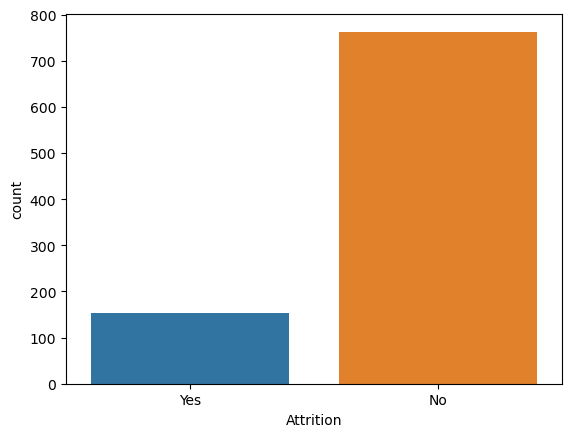

In [9]:
sns.countplot(data['Attrition'])
plt.show()

In [10]:
#Data is Imbalanced

In [11]:
data['Attrition'].value_counts(normalize=True)*100

No     83.206107
Yes    16.793893
Name: Attrition, dtype: float64

In [12]:
data.describe(include=object).T

count unique                     top freq
Attrition        917      2                      No  763
BusinessTravel   917      3           Travel_Rarely  648
Department       917      3  Research & Development  597
EducationField   917      6           Life Sciences  385
Gender           917      2                    Male  550
JobRole          917      9         Sales Executive  203
MaritalStatus    917      3                 Married  436
Over18           917      1                       Y  917
OverTime         917      2                      No  656

# EDA

In [22]:
#Outlier Detection

In [23]:
#function for outlier detection in dataset
def detect_outliers_iqr(data_frame, column_name):
    """
    Detect outliers in a numeric column of a Pandas DataFrame using the IQR method.
    
    Parameters:
        data_frame (DataFrame): The Pandas DataFrame containing the data.
        column_name (str): The name of the column to analyze for outliers.
    
    Returns:
        DataFrame: A DataFrame containing the outliers from the specified column.
    """
    # Extract the specified column
    column_data = data_frame[column_name]
    
    # Calculate the IQR
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data_frame[(column_data < lower_bound) | (column_data > upper_bound)]
    
    return outliers

# Create an empty DataFrame to store outlier statistics
outlier_stats = pd.DataFrame(columns=['Column', 'Outlier_Count', 'Outlier_Percentage'])

# Iterate through columns
for idx, column_name in enumerate(data.columns):
    # Check if the data type of the column is not 'object'
    if data[column_name].dtype != 'object':
        outliers_df = detect_outliers_iqr(data, column_name)
        outlier_count = outliers_df.shape[0]
        outlier_percentage = round((outlier_count / len(data)) * 100,2)
        # Append outlier statistics to the new DataFrame
        outlier_stats = outlier_stats.append({'Column': column_name,
                                              'Outlier_Count': outlier_count,
                                              'Outlier_Percentage': outlier_percentage},
                                             ignore_index=True)

print(colored('Features Outlier present in Dataset:-\n\n','black',attrs=['bold']),colored(outlier_stats.sort_values(by='Outlier_Percentage', ascending=False).head(10),'red',attrs=['bold']))


Features Outlier present in Dataset:-

                      Column Outlier_Count  Outlier_Percentage
20    TrainingTimesLastYear           136               16.25
15        PerformanceRating           121               14.46
24  YearsSinceLastPromotion           103               12.31
18         StockOptionLevel            56                6.69
19        TotalWorkingYears            47                5.62
11            MonthlyIncome            38                4.54
9                  JobLevel            31                3.70
22           YearsAtCompany            29                3.46
13       NumCompaniesWorked            26                3.11
0                       Age            12                1.43


In [24]:
#remove outliers as MonthlyIncome
# Calculate the IQR
Q1 = data['MonthlyIncome'].quantile(0.25)
Q3 = data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
    
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(colored(f''' 
    For Outliers Removal:- \n
        Q3 Quautile (75%) = {Q3}
        
        Q1 Quautile (25%) = {Q1}
        
        Inter Quantile Range (IQR) = {round(IQR,3)}
        
        Upper_bound = {round(upper_bound,2)}
        
        Lower_bound = {round(lower_bound,2)}
''', 'black', attrs=['bold']))

 
    For Outliers Removal:- 

        Q3 Quautile (75%) = 6667.0
        
        Q1 Quautile (25%) = 2814.0
        
        Inter Quantile Range (IQR) = 3853.0
        
        Upper_bound = 12446.5
        
        Lower_bound = -2965.5



In [25]:
#Capping on Upper Bound
data=data[data['TrainingTimesLastYear']<upper_bound]
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [26]:
#Capping on Upper Bound
data= data[data['MonthlyIncome']<upper_bound]
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [27]:
data.shape

(799, 35)

In [28]:
{column: len(data[column].unique()) for column in data.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 605,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 799,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 4,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 747,
 'MonthlyRate': 787,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 35,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 27,
 'YearsInCurrentRole': 16,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 17}

### Column Removal
    -drop"Over18" #only 1 value
    -drop"StandardHours" #only 1 value
    -drop"EmployeeNumber" #unnecessary information
    -drop"EmployeeCount" #only 1 value

## catagorical Data

In [29]:
for column in data.columns:
    if data[column].dtype == object:
        print (str(column) + ':' + str(data[column].unique()))
        print(data[column].value_counts())
        print ('________________________________')

Attrition:['Yes' 'No']
No     653
Yes    146
Name: Attrition, dtype: int64
________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        560
Travel_Frequently    154
Non-Travel            85
Name: BusinessTravel, dtype: int64
________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    514
Sales                     246
Human Resources            39
Name: Department, dtype: int64
________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'
 'Human Resources']
Life Sciences       339
Medical             239
Marketing            79
Technical Degree     74
Other                52
Human Resources      16
Name: EducationField, dtype: int64
________________________________
Gender:['Female' 'Male']
Male      483
Female    316
Name: Gender, dtype: int64
________________________________
JobRole:['Sales Executive' 'Research Sc

### Data Transformation
    - Binary columns
        - "Attrition","OverTime" and "Gender"
    - Ordinal Columns
        - "BusinessTravel"
    - Nominal cloumns
        - "Department","EducationField","JobRole", "MaritalStatus"
        
        
Note: "Could not identify the order in 'MaritalStatus' so considered it as Nominal column"

### Data Cleaning

In [30]:
def nominal_encoding(df,column):
    df=df.copy()
    
    
    dummies = pd.get_dummies(df[column],prefix=column)
    df =  pd.concat([df, dummies],axis=1)
    df = df.drop(column, axis=1)
    return df

In [31]:
def data_cleaning(df):
    df=df.copy()
    
    
    ## Drop Columns
    df=df.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'],axis=1)
    
    # Binary Encoding
    df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
    df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
    
    # Ordinal Encoding
    df['BusinessTravel']=df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
    
    # onehot Encoding
    for column in ['Department','EducationField','JobRole','MaritalStatus']:
        df= nominal_encoding(df,column=column)
        
    return df

In [32]:
df= data_cleaning(data)

In [33]:
df.shape

(799, 48)

In [34]:
df

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0     41          1               1       1102                 1          2   
1     49          0               2        279                 8          1   
2     37          1               1       1373                 2          2   
3     33          0               2       1392                 3          4   
4     27          0               1        591                 2          1   
5     32          0               2        430                24          4   
6     38          0               1        268                 2          5   
7     34          0               1        167                 8          5   
9     33          1               1        527                 1          4   
10    25          0               1        883                26          1   
11    45          0               1        954                 2          2   
12    23          0               1        310                10          1   
13    47          1               2        719                27          2   
14    34          0               1        304                 2          3   
16    36          0               0       1434                 8          4   
17    52          0               0        715                19          4   
18    26          0               2        575                 1          2   
19    29          0               1        657                27          3   
20    26          1               1       1146                 8          3   
21    34          0               1        182                 1          4   
22    54          0               1        376                19          4   
23    27          0               2        829                 8          1   
24    37          0               1        571                10          1   
25    38          0               2        240                 2          4   
26    34          0               1        121                 2          4   
27    35          0               1        384                 8          4   
28    30          0               1        921                 1          3   
29    40          0               2        791                 2          2   
30    34          0               1       1111                 8          2   
32    23          1               1       1243                 6          3   
33    24          0               0       1092                 9          3   
34    52          0               1       1325                11          4   
36    29          1               1        805                 1          2   
37    33          0               1        213                 7          3   
38    33          1               1        118                16          3   
40    36          0               1        676                 1          3   
41    29          0               1       1252                23          2   
43    35          0               1       1258                 1          4   
44    42          0               1        932                 1          2   
45    28          1               1        890                 2          4   
46    36          0               1       1041                13          3   
47    32          0               1        859                 4          3   
48    40          0               2        720                16          4   
49    30          0               1        946                 2          3   
50    45          0               1        252                 2          3   
51    42          0               1        933                29          3   
52    38          0               2        471                12          3   
53    34          0               2        702                16          4   
54    49          1               1       1184                11          3   
55    55          1               1        436         

In [35]:
df.shape

(799, 48)

IndexError: index 12 is out of bounds for axis 0 with size 12

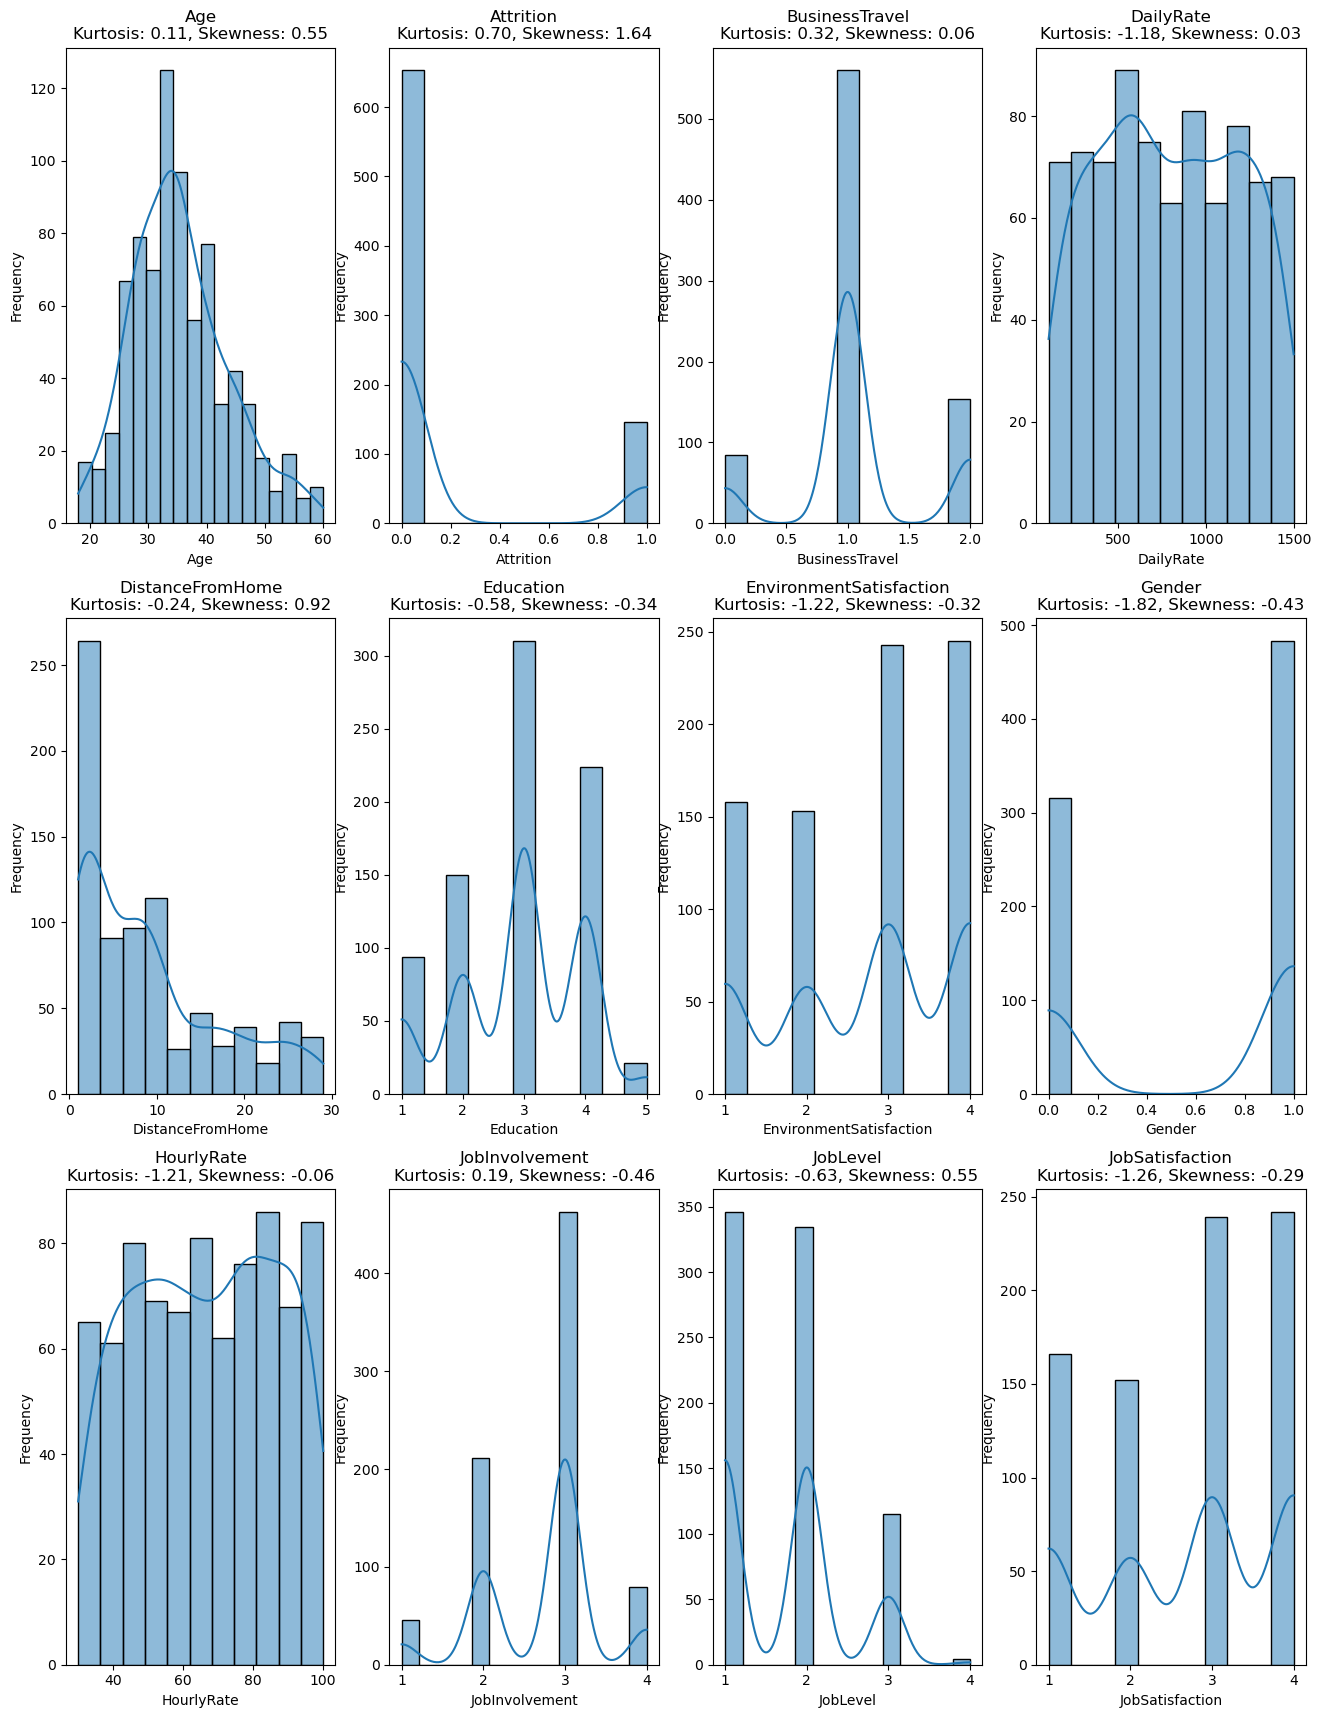

In [36]:
from scipy.stats import kurtosis, skew

num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 7 * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column_name in enumerate(num_cols):
    # Create histogram
    sns.histplot(df[column_name], kde=True, ax=axes[i])
    
    # Calculate kurtosis and skewness
    kurt = kurtosis(df[column_name])
    skew_val = skew(df[column_name])
    
    axes[i].set_title(f'{column_name}\nKurtosis: {kurt:.2f}, Skewness: {skew_val:.2f}')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Frequency')
  

## Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


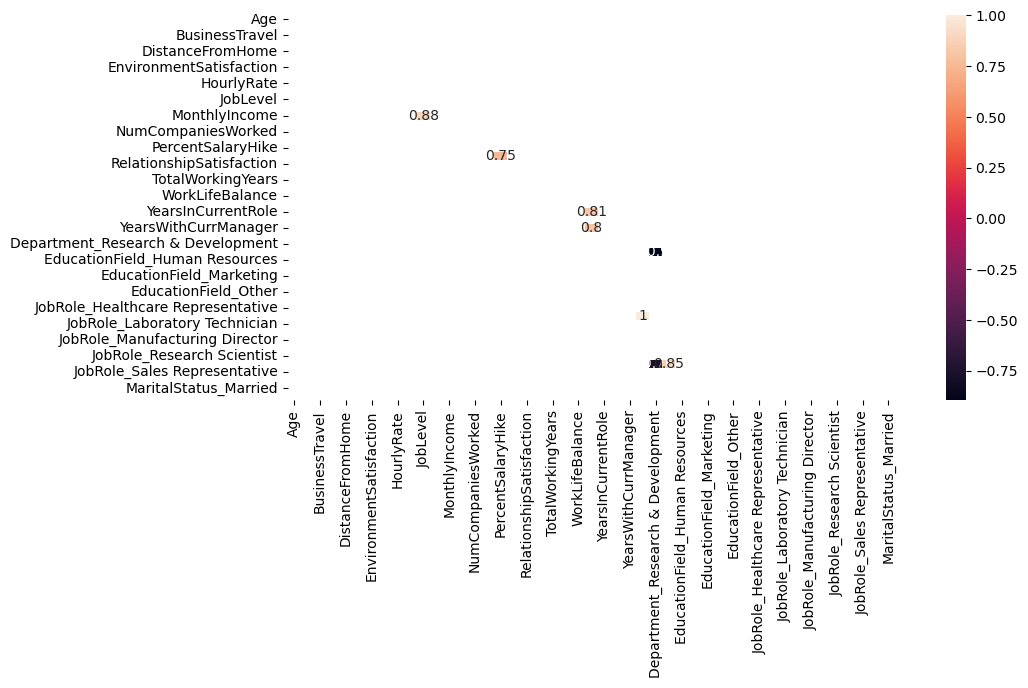

In [37]:
plt.figure(figsize=(10,5))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.75], annot=True, mask=mask)
plt.show()

In [38]:
# VIF
#No Perfect Multicollinearity - VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_results = calculate_vif(df)
print(vif_results.sort_values('VIF', ascending=True))
vif_columns=list(set(vif_results.sort_values('VIF', ascending=False).head(4)['Variable']))

##Ignore non-numerical columns

                             Variable       VIF
8                          HourlyRate  1.049799
4                    DistanceFromHome  1.055546
22                    WorkLifeBalance  1.059037
13                        MonthlyRate  1.064683
3                           DailyRate  1.067057
18           RelationshipSatisfaction  1.068130
11                    JobSatisfaction  1.070019
6             EnvironmentSatisfaction  1.070118
21              TrainingTimesLastYear  1.074879
7                              Gender  1.078164
9                      JobInvolvement  1.087880
2                      BusinessTravel  1.091934
5                           Education  1.103708
15                           OverTime  1.156320
1                           Attrition  1.329930
14                 NumCompaniesWorked  1.414341
25            YearsSinceLastPromotion  1.590131
0                                 Age  1.655985
19                   StockOptionLevel  1.972002
17                  PerformanceRating  2

In [39]:
vif_columns

['Department_Human Resources',
 'MaritalStatus_Single',
 'EducationField_Human Resources',
 'Department_Sales']

### Model Training

In [40]:
#Split Data in X and Y
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [41]:
# Copy data
trial_model = df.copy()

# Declare X and y
X = trial_model.drop('Attrition', axis=1)
y = trial_model['Attrition']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Declare Random Forest model
model_01 = RandomForestClassifier(random_state=42, class_weight = {0: 1, 1: 2})

# Fit the model
model_01.fit(X_train, y_train)

# Make predictions
y_pred = model_01.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_01, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'RandomForestClassifier',
    'Dataset': 'Full Features',    
    'Accuracy': round(accuracy,3),
    'Precision': round(precision,3),
    'Recall': round(recall,3),
    'F1_Score': round(f1,3),
    'ROC-AUC': round(roc_auc,3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(),3),
    'Average_macro': round(macro_scores.mean(),3),
    'Max_macro': round(macro_scores.max(),3),
    'Total_Features': len(X.columns),
    'Features':list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       132
           1       0.57      0.14      0.23        28

    accuracy                           0.83       160
   macro avg       0.71      0.56      0.57       160
weighted avg       0.80      0.83      0.79       160



In [42]:
# Get predicted probabilities
y_probs = model_01.predict_proba(X_test)[:, 1]

# Adjust the threshold (example: set it to 0.4)
threshold = 0.15
y_pred_adjusted = (y_probs > threshold).astype(int)

# Evaluate the adjusted predictions
adjusted_recall = recall_score(y_test, y_pred_adjusted)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_f1 = f1_score(y_test, y_pred_adjusted)

# Print the adjusted metrics
print(f"Adjusted Recall: {adjusted_recall}")
print(f"Adjusted Precision: {adjusted_precision}")
print(f"Adjusted F1-Score: {adjusted_f1}")


Adjusted Recall: 0.7857142857142857
Adjusted Precision: 0.275
Adjusted F1-Score: 0.40740740740740744


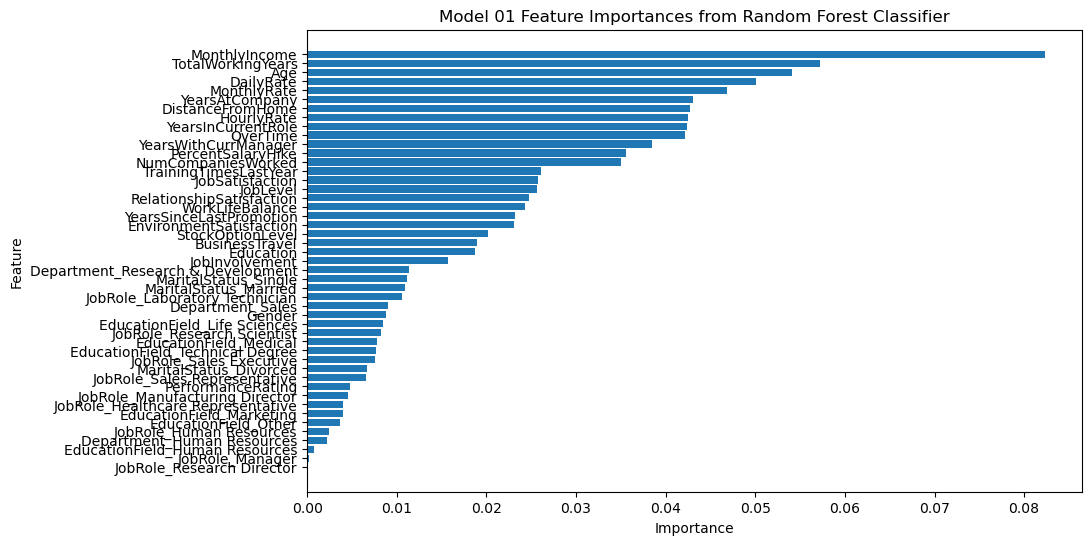

In [43]:
# Get feature importances
feature_importances = model_01.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 01 Feature Importances from Random Forest Classifier")
plt.show()

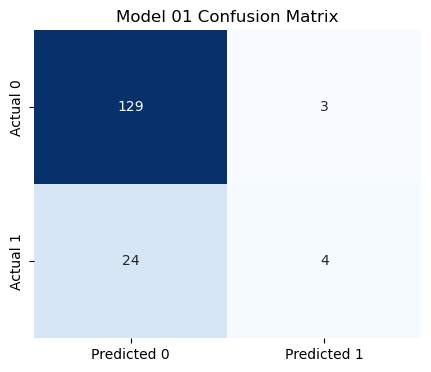

In [44]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 01 Confusion Matrix")
plt.show()

# Model Number No 02 : Random Forest (Based on Features Importances)¶

In [45]:
#Remove features impotances less than 0.01

# Set the importance threshold
importance_threshold = 0.01

# Get feature importances
feature_importances = model_01.feature_importances_

# Get feature names
feature_names = X_train.columns

# Filter features based on importance threshold
selected_features = list(feature_names[feature_importances > importance_threshold])
selected_importances = feature_importances[feature_importances > importance_threshold]
print(selected_features)

['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Research & Development', 'JobRole_Laboratory Technician', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [46]:
# Copy data
trial_model = df.copy()

# Declare X and y
X = trial_model.drop('Attrition', axis=1)
X=X[selected_features]
y = trial_model['Attrition']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Declare Random Forest model
model_02 = RandomForestClassifier(random_state=42, class_weight = {0: 1, 1: 5})

# Fit the model
model_02.fit(X_train, y_train)

# Make predictions
y_pred = model_02.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_02, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'RandomForestClassifier with feature Importance',
    'Dataset': 'Based on Features Importances',    
    'Accuracy': round(accuracy,3),
    'Precision': round(precision,3),
    'Recall': round(recall,3),
    'F1_Score': round(f1,2),
    'ROC-AUC': round(roc_auc,3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(),3),
    'Average_macro': round(macro_scores.mean(),3),
    'Max_macro': round(macro_scores.max(),3),
    'Total_Features': len(X.columns),
    'Features':list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       132
           1       0.83      0.18      0.29        28

    accuracy                           0.85       160
   macro avg       0.84      0.59      0.61       160
weighted avg       0.85      0.85      0.81       160



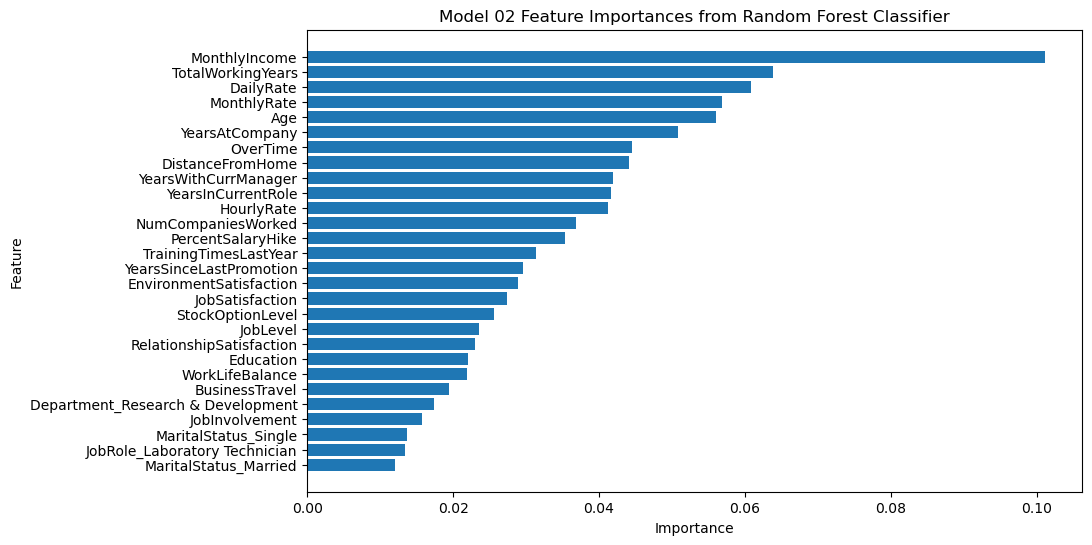

In [47]:
# Get feature importances
feature_importances = model_02.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 02 Feature Importances from Random Forest Classifier")
plt.show()

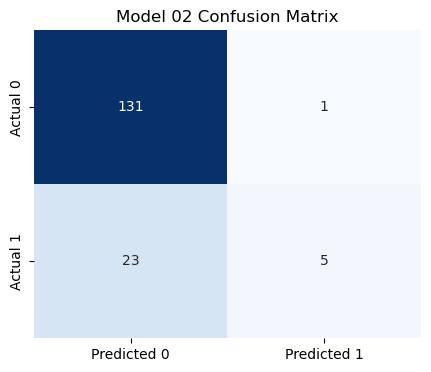

In [48]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 02 Confusion Matrix")
plt.show()

### Model Number No 03 : Gradient Boosting (Full Features)

In [49]:
#Copy data
trial_model = df.copy()

# Declare X and y
X = trial_model.drop('Attrition', axis=1)
y = trial_model['Attrition']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Declare Random Forest model
model_03 = GradientBoostingClassifier(random_state=42)

# Fit the model
model_03.fit(X_train, y_train)

# Make predictions
y_pred = model_03.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_03, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'GradientBoostingClassifier',
    'Dataset': 'Full Features',    
    'Accuracy': round(accuracy,3),
    'Precision': round(precision,3),
    'Recall': round(recall,3),
    'F1_Score': round(f1,3),
    'ROC-AUC': round(roc_auc,3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(),3),
    'Average_macro': round(macro_scores.mean(),3),
    'Max_macro': round(macro_scores.max(),3),
    'Total_Features': len(X.columns),
    'Features':list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       132
           1       0.67      0.29      0.40        28

    accuracy                           0.85       160
   macro avg       0.77      0.63      0.66       160
weighted avg       0.83      0.85      0.82       160



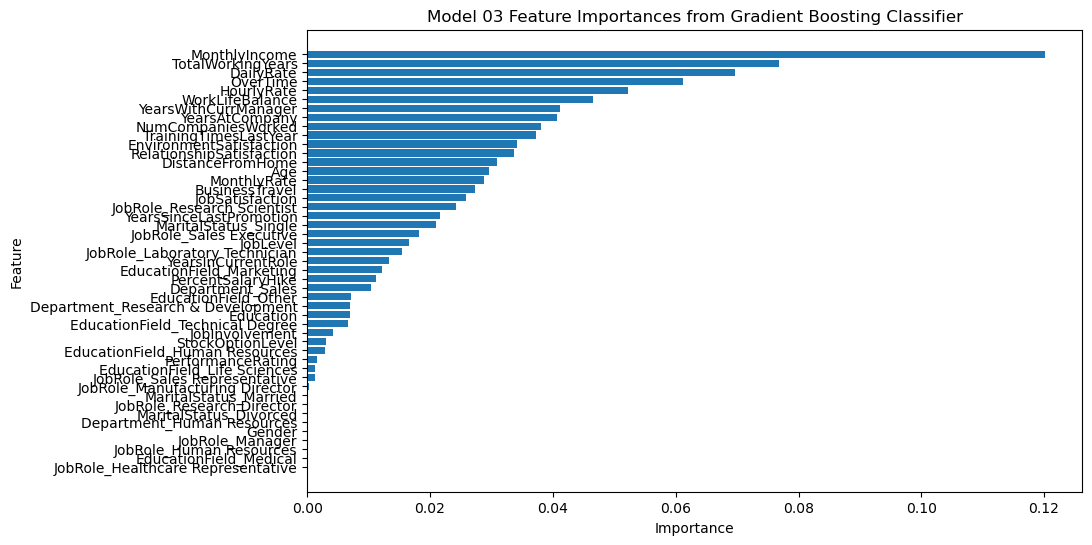

In [50]:
# Get feature importances
feature_importances = model_03.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 03 Feature Importances from Gradient Boosting Classifier")
plt.show()

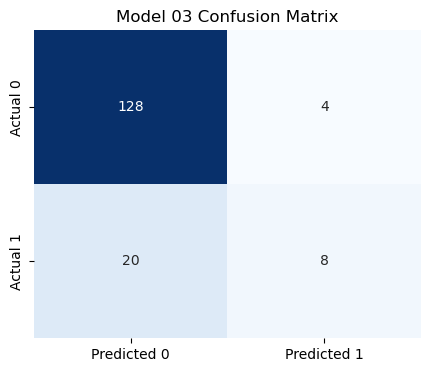

In [51]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 03 Confusion Matrix")
plt.show()

### Model Number No 04: Gradient Boosting ( Features and Hyperparameters' )

In [52]:
# Declare Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 35, 50, 75],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'learning_rate': [0.01, 0.1, 0.15, 0.2],
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}


In [53]:
# Use the best hyperparameters to create the final model
model_04 = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model with the best hyperparameters
model_04.fit(X_train, y_train)

# Make predictions
y_pred = model_04.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_04, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'GradientBoostingClassifier WIth Hyperparameter',
    'Dataset': 'Hyperparameter Tuning',   
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       132
           1       0.58      0.25      0.35        28

    accuracy                           0.84       160
   macro avg       0.72      0.61      0.63       160
weighted avg       0.81      0.84      0.81       160



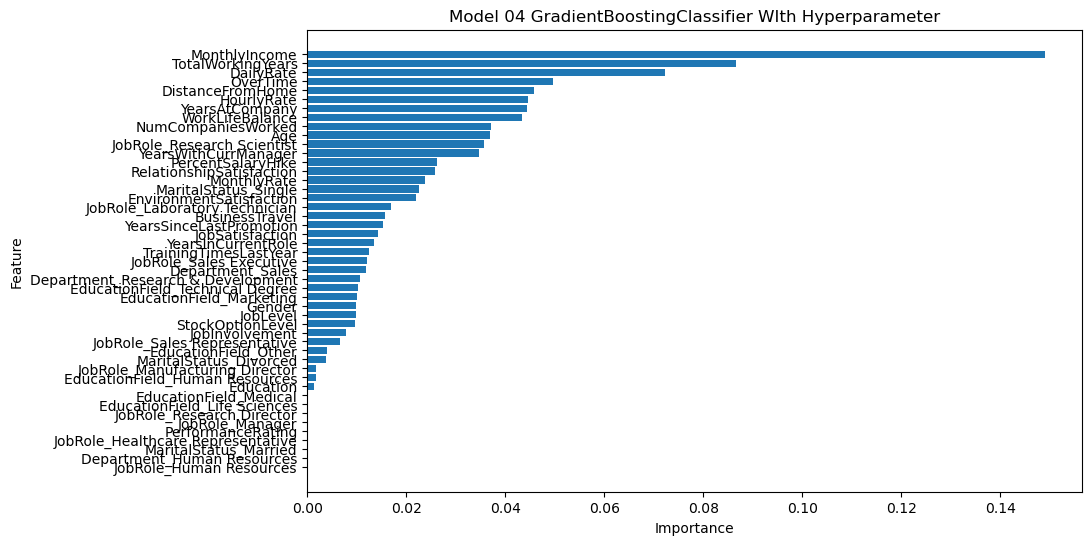

In [54]:
# Get feature importances
feature_importances = model_04.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 04 GradientBoostingClassifier WIth Hyperparameter")
plt.show()

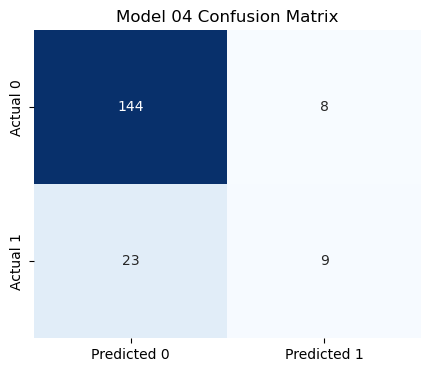

In [49]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 04 Confusion Matrix")
plt.show()

# Model Number No 5: XGBoost (Full Features and Hyperparameters' )

In [56]:
#Copy data
trial_model = df.copy()

# Declare X and y
X = trial_model.drop('Attrition', axis=1)
y = trial_model['Attrition']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Declare XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=5)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 35],
    'gamma': [0, 0.1],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'learning_rate': [0.01,0.05, 0.1,0.15,0.2,0.25,0.3,0.5],
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.15, 'n_estimators': 35}


In [58]:
# Use the best hyperparameters to create the final model
model_5 = XGBClassifier(**best_params, random_state=42)

# Fit the model with the best hyperparameters
model_5.fit(X_train, y_train)

# Make predictions
y_pred = model_5.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_5, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'XGBoost',
    'Dataset': 'Full Features & Hyperparameter Tuning',  
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       132
           1       0.50      0.21      0.30        28

    accuracy                           0.82       160
   macro avg       0.68      0.58      0.60       160
weighted avg       0.79      0.82      0.80       160



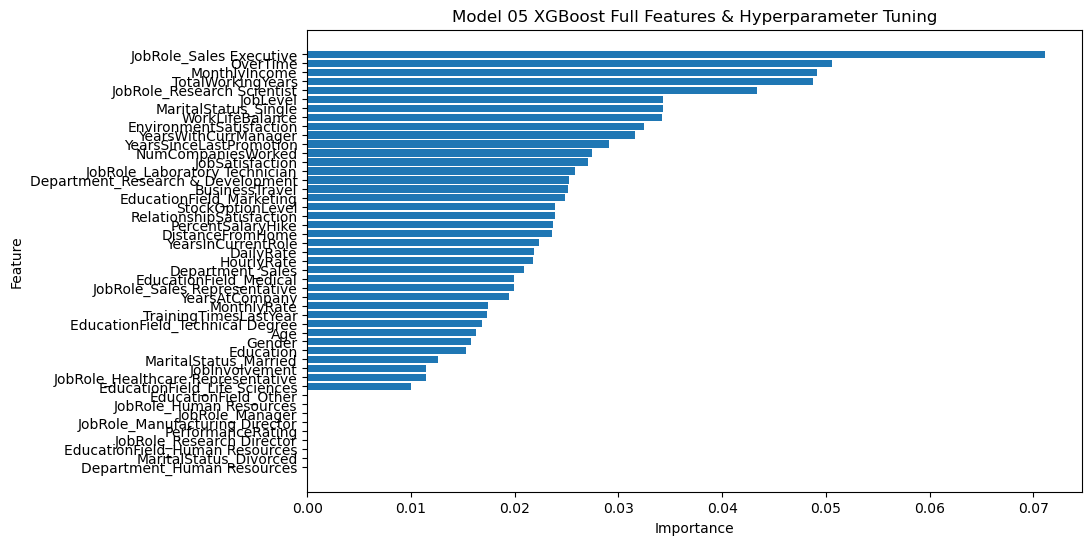

In [59]:
# Get feature importances
feature_importances = model_5.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 05 XGBoost Full Features & Hyperparameter Tuning")
plt.show()

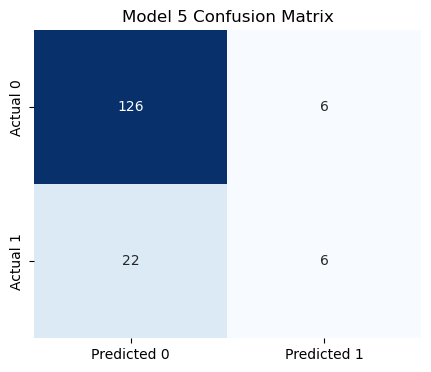

In [60]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 5 Confusion Matrix")
plt.show()

## Model Number No 6: XGBoost (Feature Importsnces and Hyperparameters' )

In [61]:
#Remove features impotances less than 0.01

# Set the importance threshold
importance_threshold = 0.01

# Get feature importances
feature_importances = model_5.feature_importances_

# Get feature names
feature_names = X_train.columns

# Filter features based on importance threshold
selected_features = list(feature_names[feature_importances > importance_threshold])
selected_importances = feature_importances[feature_importances > importance_threshold]
print(selected_features)

['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Research & Development', 'Department_Sales', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [62]:
#Copy data
trial_model = df.copy()

# Declare X and y
X = trial_model.drop('Attrition', axis=1)
X=X[selected_features]
y = trial_model['Attrition']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Declare XGBoost model
xgb_model = XGBClassifier(random_state=42,  scale_pos_weight=5)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 35],
    'gamma': [0, 0.1,0.25,0.5,0.6,0.8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'learning_rate': [0.01,0.05, 0.1,0.15,0.2,0.25,0.3,0.5],
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.6, 'learning_rate': 0.2, 'n_estimators': 20}


In [64]:
# Use the best hyperparameters to create the final model
model_6 = XGBClassifier(**best_params, random_state=42, scale_pos_weight=5)

# Fit the model with the best hyperparameters
model_6.fit(X_train, y_train)

# Make predictions
y_pred = model_6.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_6, X=X_train, y=y_train, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'XGBoost WIth FI & Hyperparamater',
    'Dataset': 'Feature Importances & Hyperparameter Tuning', 
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       132
           1       0.50      0.39      0.44        28

    accuracy                           0.82       160
   macro avg       0.69      0.65      0.67       160
weighted avg       0.81      0.82      0.82       160



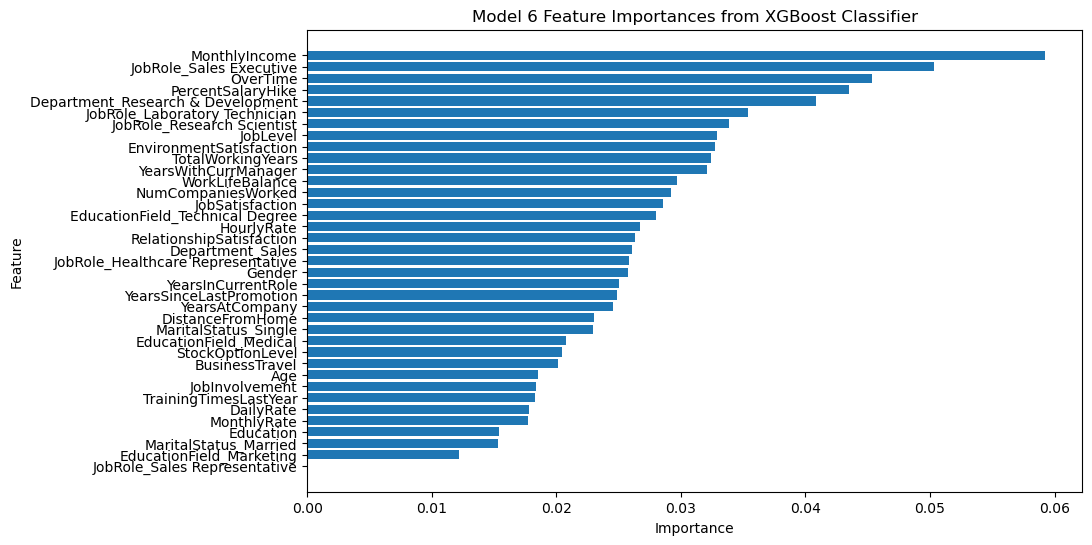

In [65]:
# Get feature importances
feature_importances = model_6.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 6 Feature Importances from XGBoost Classifier")
plt.show()

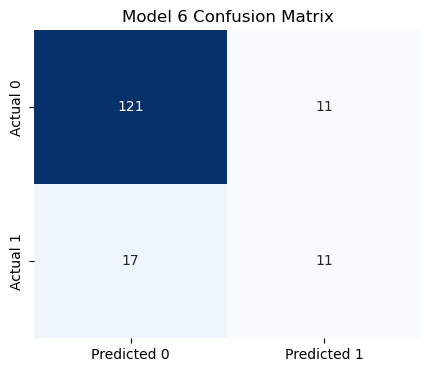

In [66]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 6 Confusion Matrix")
plt.show()

# Comfusion Metrics of all models with Balanced data set

In [67]:
X_train.shape,y_train.shape

((639, 37), (639,))

In [68]:
y_train.value_counts()

0    521
1    118
Name: Attrition, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE
# Use SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

0    521
1    521
Name: Attrition, dtype: int64

In [70]:
# Fit the model with the best hyperparameters
model_01.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_01.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_01, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'RandomForestClassifier WIth Smote',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       132
           1       0.43      0.36      0.39        28

    accuracy                           0.81       160
   macro avg       0.65      0.63      0.64       160
weighted avg       0.79      0.81      0.80       160



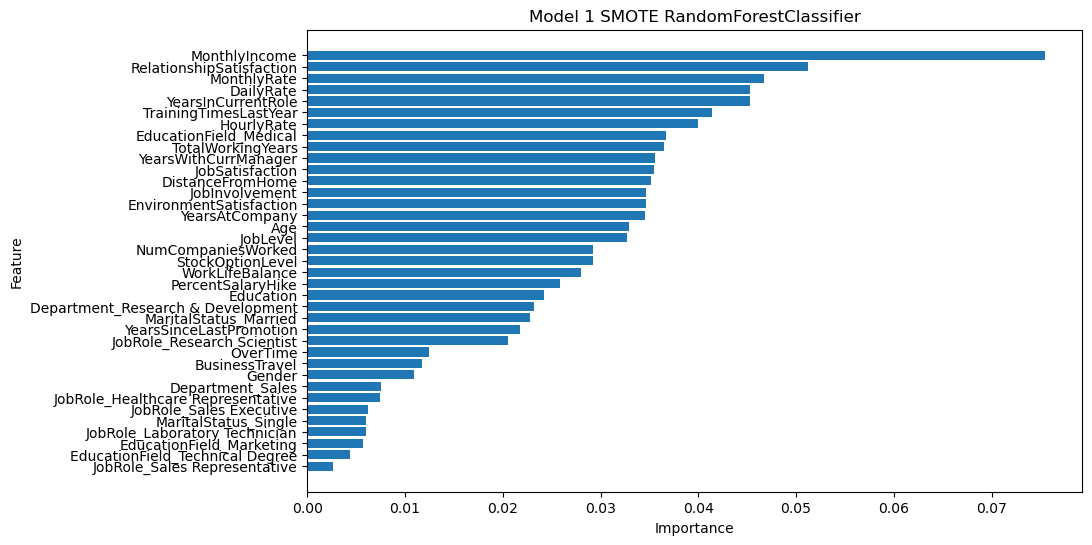

In [71]:
# Get feature importances
feature_importances = model_01.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 1 SMOTE RandomForestClassifier" )
plt.show()

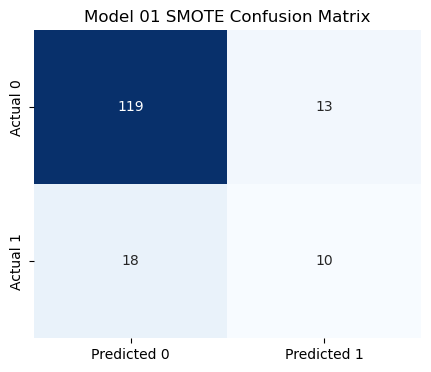

In [72]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 01 SMOTE Confusion Matrix")
plt.show()

M0del 02

In [73]:
# Fit the model with the best hyperparameters
model_02.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_02.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_02, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'RandomForestClassifier with FI-Smote',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       132
           1       0.39      0.25      0.30        28

    accuracy                           0.80       160
   macro avg       0.62      0.58      0.59       160
weighted avg       0.77      0.80      0.78       160



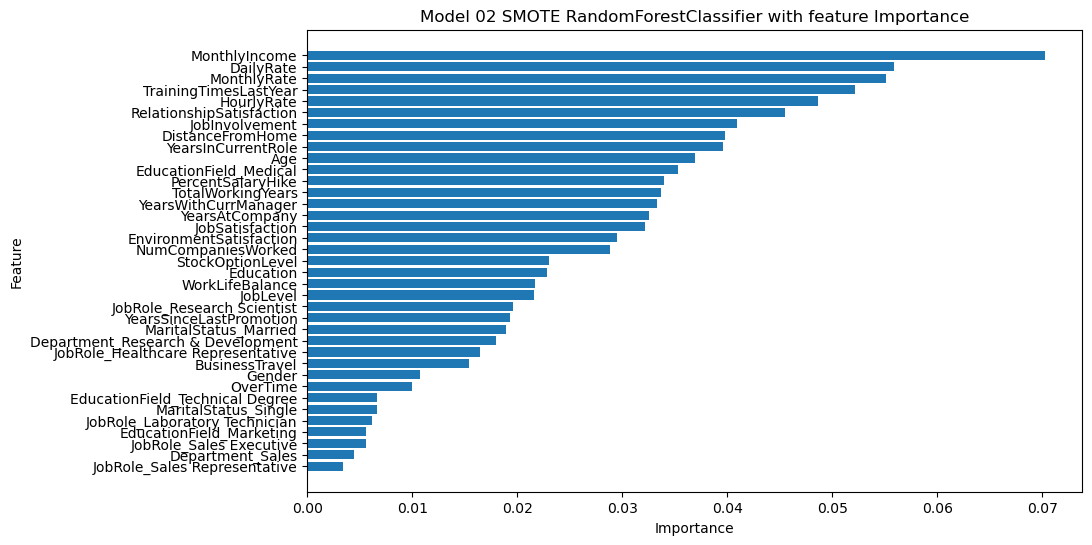

In [74]:
# Get feature importances
feature_importances = model_02.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 02 SMOTE RandomForestClassifier with feature Importance")
plt.show()

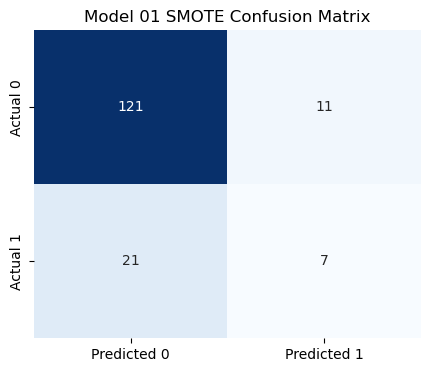

In [75]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 01 SMOTE Confusion Matrix")
plt.show()

In [76]:
# Model3

In [77]:
# Fit the model with the best hyperparameters
model_03.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_03.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_03, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'GradientBoostingClassifier',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       132
           1       0.38      0.39      0.39        28

    accuracy                           0.78       160
   macro avg       0.62      0.63      0.63       160
weighted avg       0.78      0.78      0.78       160



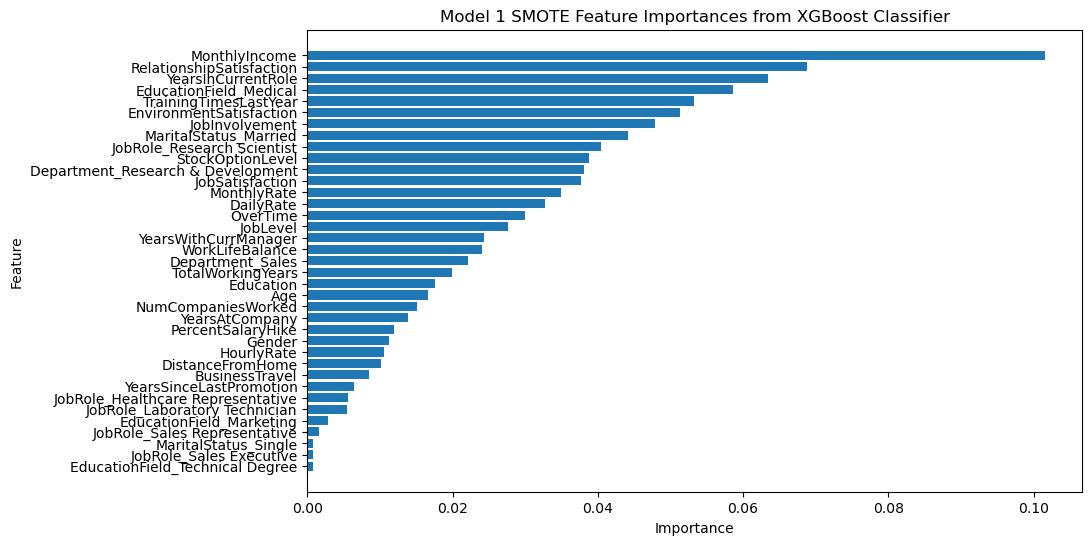

In [78]:
# Get feature importances
feature_importances = model_03.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 1 SMOTE Feature Importances from XGBoost Classifier")
plt.show()

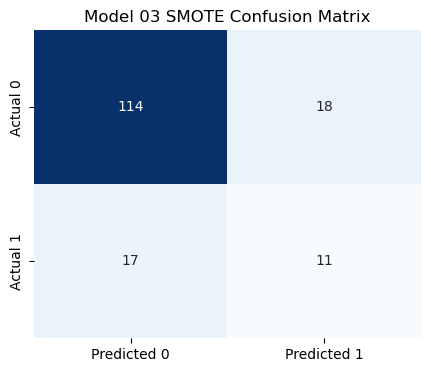

In [79]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 03 SMOTE Confusion Matrix")
plt.show()

In [80]:
# MOdel 04

In [81]:
# Fit the model with the best hyperparameters
model_04.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_04.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_04, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'GradientBoostingClassifier WIth Hyperparameter',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       132
           1       0.36      0.43      0.39        28

    accuracy                           0.77       160
   macro avg       0.62      0.63      0.63       160
weighted avg       0.78      0.77      0.78       160



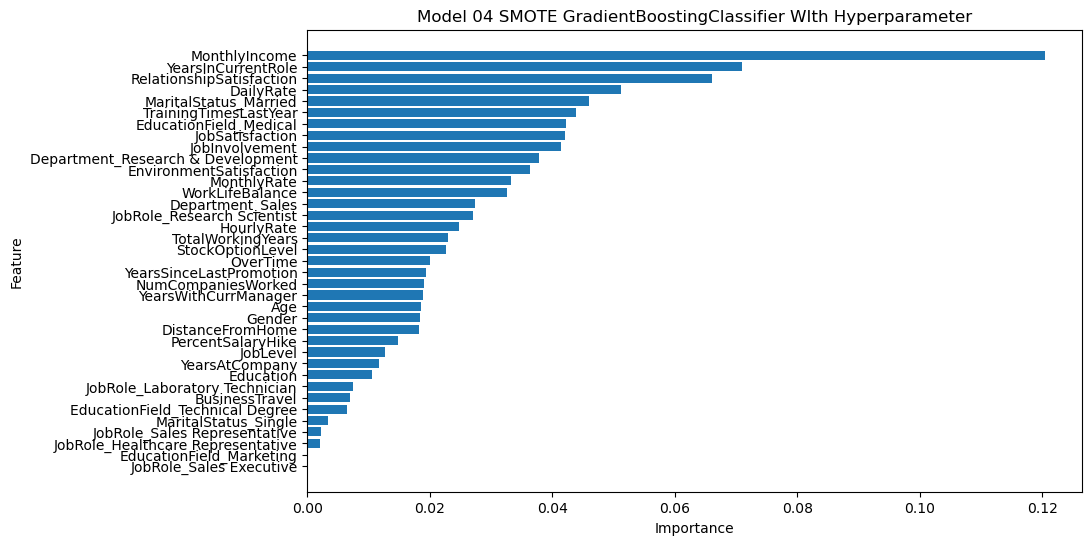

In [82]:
# Get feature importances
feature_importances = model_04.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 04 SMOTE GradientBoostingClassifier WIth Hyperparameter")
plt.show()

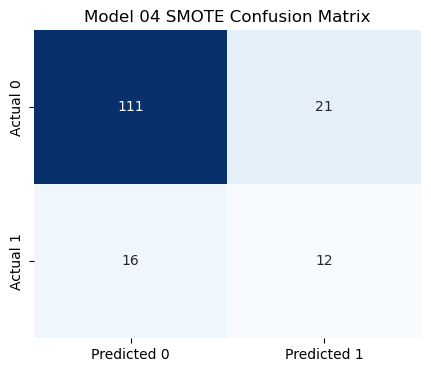

In [83]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 04 SMOTE Confusion Matrix")
plt.show()

# Model 5

In [84]:
# Fit the model with the best hyperparameters
model_5.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_5.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_5, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'Full Features & Hyperparameter Tuning',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       132
           1       0.44      0.39      0.42        28

    accuracy                           0.81       160
   macro avg       0.66      0.64      0.65       160
weighted avg       0.80      0.81      0.80       160



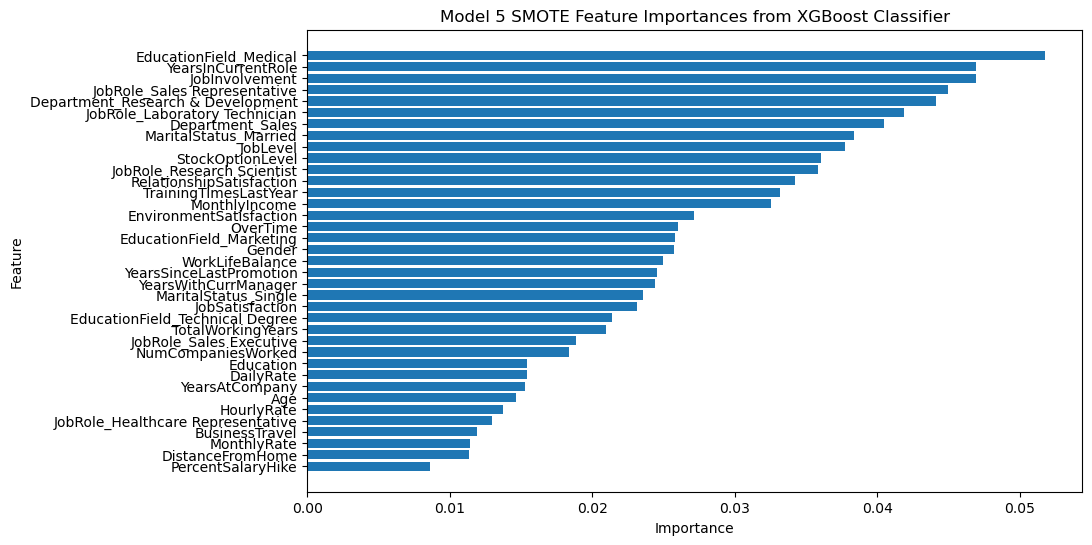

In [90]:
# Get feature importances
feature_importances = model_5.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 5 SMOTE Feature Importances from XGBoost Classifier")
plt.show()

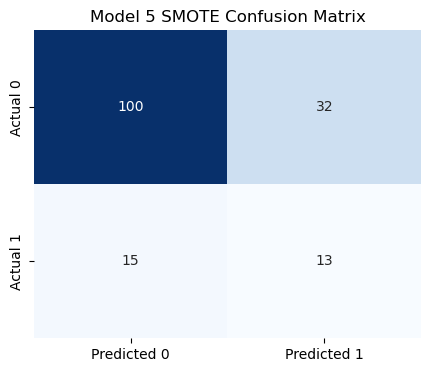

In [91]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 5 SMOTE Confusion Matrix")
plt.show()

In [92]:
# Fit the model with the best hyperparameters
model_6.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_6.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(f"\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Cross-validation for the model
macro_scores = cross_val_score(estimator=model_6, X=X_train_resampled, y=y_train_resampled, cv=5, scoring='f1_macro')

# Append results to the dataframe
model_df = model_df.append({
    'Model': 'Full Features & Hyperparameter Tuning',
    'Dataset': 'Balance Dataset by Oversampling',    
    'Accuracy': round(accuracy, 3),
    'Precision': round(precision, 3),
    'Recall': round(recall, 3),
    'F1_Score': round(f1, 3),
    'ROC-AUC': round(roc_auc, 3),
    'Confusion_Matrix': conf_matrix.tolist(),
    'Min_macro': round(macro_scores.min(), 3),
    'Average_macro': round(macro_scores.mean(), 3),
    'Max_macro': round(macro_scores.max(), 3),
    'Total_Features': len(X.columns),
    'Features': list(X.columns)
}, ignore_index=True)



Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       132
           1       0.29      0.46      0.36        28

    accuracy                           0.71       160
   macro avg       0.58      0.61      0.58       160
weighted avg       0.77      0.71      0.73       160



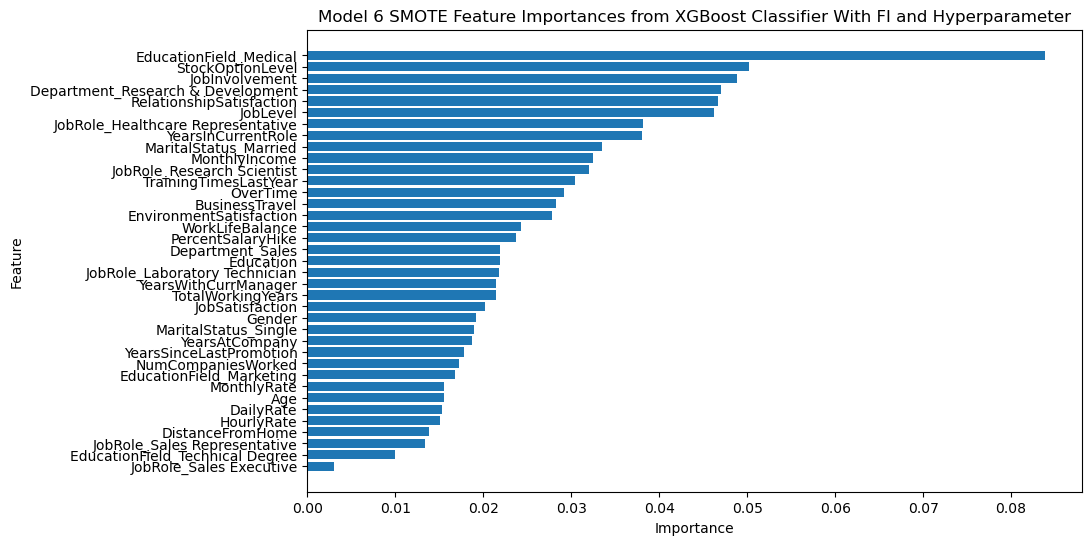

In [94]:
# Get feature importances
feature_importances = model_6.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance in ascending order
indices = np.argsort(feature_importances)[::]

# Plotting the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], feature_importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model 6 SMOTE Feature Importances from XGBoost Classifier With FI and Hyperparameter")
plt.show()

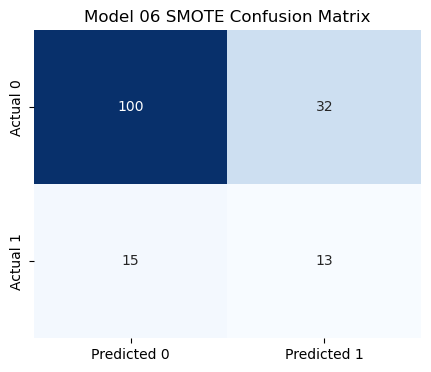

In [95]:
cm=conf_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Model 06 SMOTE Confusion Matrix")
plt.show()

In [86]:
model_df

Model  \
0                           RandomForestClassifier   
1   RandomForestClassifier with feature Importance   
2                       GradientBoostingClassifier   
3   GradientBoostingClassifier WIth Hyperparameter   
4                                          XGBoost   
5                 XGBoost WIth FI & Hyperparamater   
6                RandomForestClassifier WIth Smote   
7             RandomForestClassifier with FI-Smote   
8                       GradientBoostingClassifier   
9   GradientBoostingClassifier WIth Hyperparameter   
10           Full Features & Hyperparameter Tuning   
11           Full Features & Hyperparameter Tuning   

                                        Dataset  Accuracy  Precision  Recall  \
0                                 Full Features     0.832      0.667   0.062   
1                 Based on Features Importances     0.842      1.000   0.094   
2                                 Full Features     0.853      0.647   0.344   
3                         Hyperparameter Tuning     0.832      0.529   0.281   
4         Full Features & Hyperparameter Tuning     0.870      0.700   0.438   
5   Feature Importances & Hyperparameter Tuning     0.832      0.522   0.375   
6               Balance Dataset by Oversampling     0.837      0.556   0.312   
7               Balance Dataset by Oversampling     0.848      0.700   0.219   
8               Balance Dataset by Oversampling     0.859      0.625   0.469   
9               Balance Dataset by Oversampling     0.837      0.550   0.344   
10              Balance Dataset by Oversampling     0.842      0.571   0.375   
11              Balance Dataset by Oversampling     0.864      0.630   0.531   

    F1_Score  ROC-AUC       Confusion_Matrix  Min_macro  Average_macro  \
0      0.114    0.528    [[151, 1], [30, 2]]      0.487          0.552   
1      0.170    0.547    [[152, 0], [29, 3]]      0.451          0.499   
2      0.449    0.652   [[146, 6], [21, 11]]      0.589          0.677   
3      0.367    0.614    [[144, 8], [23, 9]]      0.568          0.666   
4      0.538    0.699   [[146, 6], [18, 14]]      0.539          0.653   
5      0.436    0.651  [[141, 11], [20, 12]]      0.646          0.684   
6      0.400    0.630   [[144, 8], [22, 10]]      0.641          0.905   
7      0.333    0.600    [[149, 3], [25, 7]]      0.523          0.881   
8      0.536    0.705   [[143, 9], [17, 15]]      0.533          0.862   
9      0.423    0.642   [[143, 9], [21, 11]]      0.576          0.877   
10     0.453    0.658   [[143, 9], [20, 12]]      0.600          0.877   
11     0.576    0.733  [[142, 10], [15, 17]]      0.685          0.879   

    Max_macro Total_Features  \
0       0.636             47   
1       0.572             29   
2       0.758             47   
3       0.778             47   
4       0.710             47   
5       0.750             37   
6       0.988             37   
7       0.988             37   
8       0.963             37   
9       0.967             37   
10      0.963             37   
11      0.938             37   

                                             Features  
0   [Age, BusinessTravel, DailyRate, DistanceFromH...  
1   [Age, BusinessTravel, DailyRate, DistanceFromH...  
2   [Age, BusinessTravel, DailyRate, DistanceFromH...  
3   [Age, BusinessTravel, DailyRate, DistanceFromH...  
4   [Age, BusinessTravel, DailyRate, DistanceFromH...  
5   [Age, BusinessTravel, DailyRate, DistanceFromH...  
6   [Age, BusinessTravel, DailyRate, DistanceFromH...  
7   [Age, BusinessTravel, DailyRate, DistanceFromH...  
8   [Age, BusinessTravel, DailyRate, DistanceFromH...  
9   [Age, BusinessTravel, DailyRate, DistanceFromH...  
10  [Age, BusinessTravel, DailyRate, DistanceFromH...  
11  [Age, BusinessTravel, DailyRate, DistanceFromH...